<a href="https://colab.research.google.com/github/Manaswini1912/INFO-5731/blob/main/Kodela_Manaswini_Exercise_4_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [17]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 37.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [19]:
import numpy as np
import pandas as pd
from gensim import corpora
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Sample text corpus
text_corpus = [
    "sentiment analysis of customer reviews for e-commerce products.",
    "In this task, the goal is to classify customer reviews as positive, neutral, or negative sentiments based on their content.",
    "Here are some features that might be useful for building the machine learning model:",
    "Word Frequency: Counting the frequency of each word in the review.",
    "Words that frequently appear in positive or negative reviews may indicate sentiment polarity.",
    "Sentiment Lexicons: Using sentiment lexicons or dictionaries to identify words with positive or negative sentiment.",
    "This feature can capture sentiment-bearing words and their polarity, such as 'good,' 'excellent,' 'bad,' or 'poor.'",
    "N-grams: Extracting sequences of adjacent words of length n from the review.",
    "N-grams can capture the context and co-occurrence of words, providing insights into the sentiment expressed in phrases or sentences.",
    "Part of Speech (POS) Tags: Identifying the parts of speech (e.g., nouns, verbs, adjectives) in the review.",
    "POS tags can help identify sentiment-bearing words and their roles in the sentence structure.",
    "Review Length: Calculating the length of the review in terms of words or characters.",
    "Longer reviews may contain more detailed sentiments, while shorter reviews may be more concise in expressing sentiments."
]

# Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to get part of speech for lemmatization
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

processed_corpus = []
for doc in text_corpus:
    tokens = word_tokenize(doc.lower())
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    processed_corpus.append(tokens)

# Create dictionary and corpus
dictionary = corpora.Dictionary(processed_corpus)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_corpus]

# Compute coherence scores for different values of K
coherence_scores = []
for k in range(2, 11):
    lda_model = LdaMulticore(bow_corpus, num_topics=k, id2word=dictionary, passes=2, workers=2)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_corpus, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_score)

# Choose the number of topics with the highest coherence score
optimal_k = np.argmax(coherence_scores) + 2  # Add 2 because the range starts from 2

# Train the final LDA model with the optimal number of topics
lda_model_final = LdaMulticore(bow_corpus, num_topics=optimal_k, id2word=dictionary, passes=2, workers=2)

# Display the topics
for idx, topic in lda_model_final.print_topics(-1):
    print(f"Topic: {idx + 1}")
    print(f"Words: {topic}")
    print()

# Visualize the topics
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_final, bow_corpus, dictionary)
vis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Topic: 1
Words: 0.125*"word" + 0.065*"sentiment-bearing" + 0.065*"frequency" + 0.034*"polarity" + 0.034*"help" + 0.034*"'bad" + 0.034*"role" + 0.034*"sentence" + 0.034*"'good" + 0.034*"'poor"

Topic: 2
Words: 0.042*"capture" + 0.042*"sentence" + 0.042*"express" + 0.042*"word" + 0.042*"co-occurrence" + 0.042*"phrase" + 0.042*"insight" + 0.042*"n-grams" + 0.042*"provide" + 0.042*"context"

Topic: 3
Words: 0.161*"sentiment" + 0.067*"review" + 0.067*"may" + 0.067*"lexicon" + 0.035*"shorter" + 0.035*"express" + 0.035*"concise" + 0.035*"longer" + 0.035*"dictionary" + 0.035*"identify"

Topic: 4
Words: 0.076*"review" + 0.076*"customer" + 0.076*"product" + 0.076*"analysis" + 0.076*"e-commerce" + 0.076*"sentiment" + 0.008*"word" + 0.008*"length" + 0.008*"negative" + 0.008*"may"

Topic: 5
Words: 0.014*"sentiment" + 0.014*"review" + 0.014*"word" + 0.014*"length" + 0.014*"may" + 0.014*"frequency" + 0.014*"sentiment-bearing" + 0.014*"customer" + 0.014*"positive" + 0.014*"feature"

Topic: 6
Words: 0.

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.136411  0.023926       1        1  23.120287
0      0.124062  0.029434       2        1  19.001354
2     -0.126491 -0.021906       3        1  18.849615
1      0.077607 -0.152932       4        1  14.722657
7      0.067166  0.132210       5        1  10.446741
5      0.009555 -0.006102       6        1   7.141873
3     -0.037455  0.000171       7        1   5.501601
4      0.021966 -0.004802       8        1   1.215872, topic_info=         Term      Freq     Total Category  logprob  loglift
5   sentiment  6.000000  6.000000  Default  30.0000  30.0000
55       part  1.000000  1.000000  Default  29.0000  29.0000
57     speech  1.000000  1.000000  Default  28.0000  28.0000
41     length  2.000000  2.000000  Default  27.0000  27.0000
4      review  7.000000  7.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
37    capture  0.020550  1.914702   Topic8  -4.2627  -0.1247
47    express  0.020550  1.930731   Topic8  -4.2627  -0.1331
31    lexicon  0.020550  1.982975   Topic8  -4.2627  -0.1598
51   sentence  0.020550  1.914703   Topic8  -4.2627  -0.1248
63  calculate  0.020549  1.296244   Topic8  -4.2627   0.2653

[381 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
33        2  0.795345        'bad
34        2  0.795346  'excellent
35        2  0.795345       'good
36        2  0.795345       'poor
39        6  0.933203    adjacent
...     ...       ...         ...
23        1  0.299490        word
23        2  0.449234        word
23        3  0.149745        word
23        4  0.149745        word
23        6  0.149745        word

[92 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 3, 2, 8, 6, 4, 5])

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [30]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import Normalizer
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Sample text corpus
text_corpus = [
    "sentiment analysis of customer reviews for e-commerce products.",
    "In this task, the goal is to classify customer reviews as positive, neutral, or negative sentiments based on their content.",
    "Here are some features that might be useful for building the machine learning model:",
    "Word Frequency: Counting the frequency of each word in the review.",
    "Words that frequently appear in positive or negative reviews may indicate sentiment polarity.",
    "Sentiment Lexicons: Using sentiment lexicons or dictionaries to identify words with positive or negative sentiment.",
    "This feature can capture sentiment-bearing words and their polarity, such as 'good,' 'excellent,' 'bad,' or 'poor.'",
    "N-grams: Extracting sequences of adjacent words of length n from the review.",
    "N-grams can capture the context and co-occurrence of words, providing insights into the sentiment expressed in phrases or sentences.",
    "Part of Speech (POS) Tags: Identifying the parts of speech (e.g., nouns, verbs, adjectives) in the review.",
    "POS tags can help identify sentiment-bearing words and their roles in the sentence structure.",
    "Review Length: Calculating the length of the review in terms of words or characters.",
    "Longer reviews may contain more detailed sentiments, while shorter reviews may be more concise in expressing sentiments."
]

# Preprocessing
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    return tokens

processed_corpus = [preprocess_text(doc) for doc in text_corpus]

# Create a Gensim dictionary
gensim_dictionary = Dictionary(processed_corpus)

# Apply LSA
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([' '.join(doc) for doc in processed_corpus])
lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_topic_matrix = lsa_model.fit_transform(X)

# Normalize the LSA topic matrix
lsa_topic_matrix = Normalizer(copy=False).fit_transform(lsa_topic_matrix)

# Convert the LSA topic matrix into a list of tokenized texts
lsa_tokenized_texts = []
for topic in lsa_topic_matrix:
    topic_tokens = [gensim_dictionary[index] for index in np.argsort(topic)[::-1][:10]]  # Top 10 tokens for each topic
    lsa_tokenized_texts.append(topic_tokens)

# Compute coherence scores for different values of K
coherence_scores = []
for k in range(2, 11):
    coherence_model_lsa = CoherenceModel(topics=lsa_tokenized_texts, texts=processed_corpus, dictionary=gensim_dictionary, coherence='c_v')
    coherence_score = coherence_model_lsa.get_coherence()
    coherence_scores.append(coherence_score)

# Choose the number of topics with the highest coherence score
optimal_k = np.argmax(coherence_scores) + 2  # Add 2 because the range starts from 2

# Apply LSA with the optimal number of topics
lsa_model_final = TruncatedSVD(n_components=optimal_k, random_state=42)
lsa_topic_matrix_final = lsa_model_final.fit_transform(X)
lsa_topic_matrix_final = Normalizer(copy=False).fit_transform(lsa_topic_matrix_final)

# Print the topics
print(f"Optimal number of topics: {optimal_k}")
print("Topics:")
for i, topic in enumerate(lsa_model_final.components_):
    print(f"Topic {i + 1}:")
    print([gensim_dictionary[index] for index in topic.argsort()[:-11:-1]])
    print()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Optimal number of topics: 2
Topics:
Topic 1:
['tags', 'longer', 'capture', 'n', 'adjectives', 'part', 'lexicons', 'adjacent', 'phrases', 'useful']

Topic 2:
['part', 'verbs', 'adjacent', 'task', 'building', 'review', 'model', 'roles', 'feature', 'might']



## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [9]:
!pip install bertopic
from bertopic import BERTopic
import pandas as pd

# Define the corpus
corpus = [
    "sentiment analysis of customer reviews for e-commerce products.",
    "In this task, the goal is to classify customer reviews as positive, neutral, or negative sentiments based on their content.",
    "Here are some features that might be useful for building the machine learning model:",
    "Word Frequency: Counting the frequency of each word in the review.",
    "Words that frequently appear in positive or negative reviews may indicate sentiment polarity.",
    "Sentiment Lexicons: Using sentiment lexicons or dictionaries to identify words with positive or negative sentiment.",
    "This feature can capture sentiment-bearing words and their polarity, such as 'good,' 'excellent,' 'bad,' or 'poor.'",
    "N-grams: Extracting sequences of adjacent words of length n from the review.",
    "N-grams can capture the context and co-occurrence of words, providing insights into the sentiment expressed in phrases or sentences.",
    "Part of Speech (POS) Tags: Identifying the parts of speech (e.g., nouns, verbs, adjectives) in the review.",
    "POS tags can help identify sentiment-bearing words and their roles in the sentence structure.",
    "Review Length: Calculating the length of the review in terms of words or characters.",
    "Longer reviews may contain more detailed sentiments, while shorter reviews may be more concise in expressing sentiments."
]

# Create a DataFrame with the corpus
df = pd.DataFrame({"text": corpus})

# Instantiate BERTopic model
model = BERTopic()

# Fit the model to the corpus
topics, _ = model.fit_transform(df["text"])

# Summarize the topics
topic_summary = model.get_topic_info()

print("Topic Summary:")
print(topic_summary)



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 26.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 21.9 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Topic Summary:
   Topic  Count                Name  \
0     -1     13  -1_the_of_in_words   

                                      Representation  \
0  [the, of, in, words, or, sentiment, review, re...   

                                 Representative_Docs  
0  [Words that frequently appear in positive or n...  


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

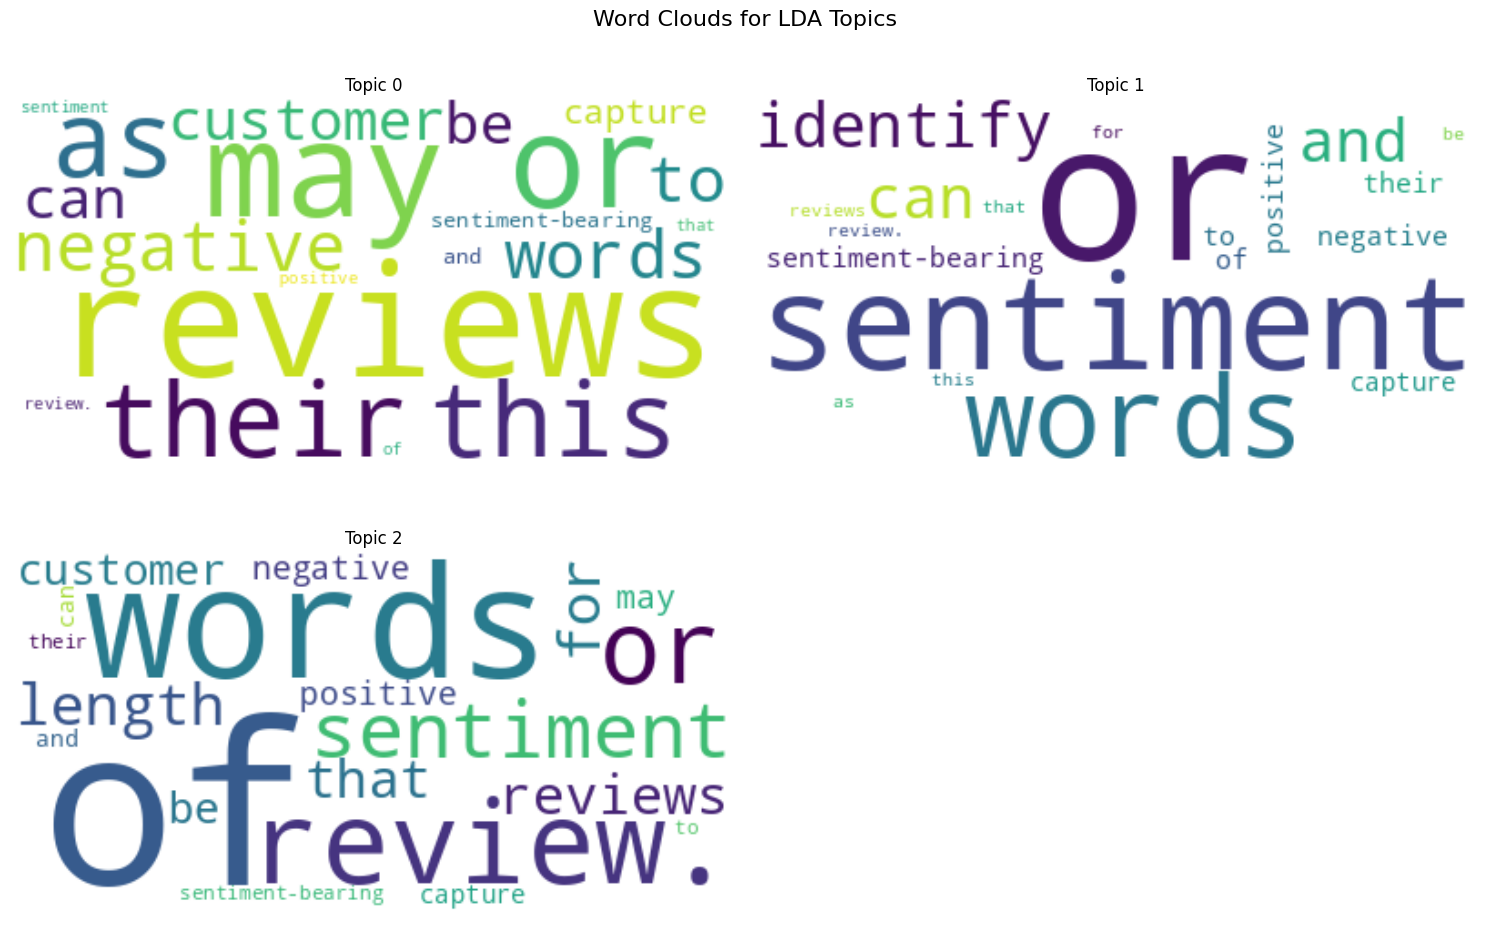

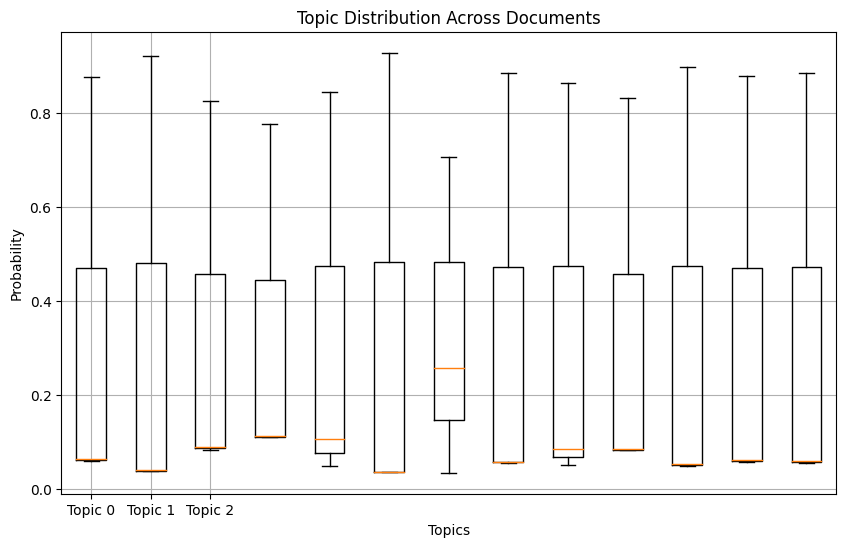

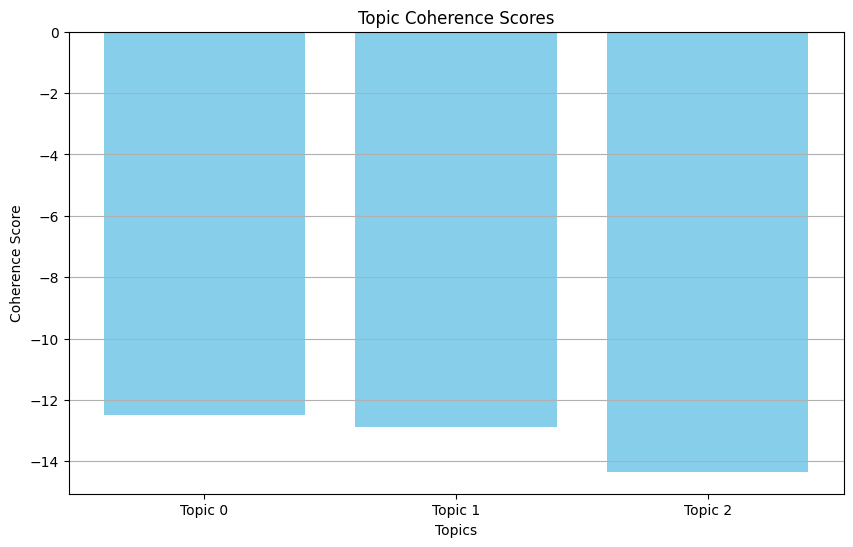

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.models import LdaModel
from gensim.corpora import Dictionary

# Define the corpus
corpus = [
    "sentiment analysis of customer reviews for e-commerce products.",
    "In this task, the goal is to classify customer reviews as positive, neutral, or negative sentiments based on their content.",
    "Here are some features that might be useful for building the machine learning model:",
    "Word Frequency: Counting the frequency of each word in the review.",
    "Words that frequently appear in positive or negative reviews may indicate sentiment polarity.",
    "Sentiment Lexicons: Using sentiment lexicons or dictionaries to identify words with positive or negative sentiment.",
    "This feature can capture sentiment-bearing words and their polarity, such as 'good,' 'excellent,' 'bad,' or 'poor.'",
    "N-grams: Extracting sequences of adjacent words of length n from the review.",
    "N-grams can capture the context and co-occurrence of words, providing insights into the sentiment expressed in phrases or sentences.",
    "Part of Speech (POS) Tags: Identifying the parts of speech (e.g., nouns, verbs, adjectives) in the review.",
    "POS tags can help identify sentiment-bearing words and their roles in the sentence structure.",
    "Review Length: Calculating the length of the review in terms of words or characters.",
    "Longer reviews may contain more detailed sentiments, while shorter reviews may be more concise in expressing sentiments."
]

# Tokenize the corpus
tokenized_corpus = [doc.lower().split() for doc in corpus]

# Create a dictionary representation of the documents
dictionary = Dictionary(tokenized_corpus)

# Filter out tokens that appear in less than 2 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=2, no_above=0.5)

# Create a bag of words representation of the documents
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_corpus]

# Instantiate an LDA model
num_topics = 3
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics)

# Visualization 1: Word Clouds
plt.figure(figsize=(15, 10))
for topic_id in range(lda_model.num_topics):
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(dict(lda_model.show_topic(topic_id, topn=20)))
    plt.subplot(2, 2, topic_id+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Topic ' + str(topic_id))
    plt.axis('off')
plt.suptitle('Word Clouds for LDA Topics', fontsize=16)
plt.tight_layout()
plt.show()

# Visualization 2: Topic Distribution
topic_distribution = [lda_model.get_document_topics(doc) for doc in bow_corpus]
topic_distribution = [[topic[1] if topic else 0 for topic in doc_topics] for doc_topics in topic_distribution]

plt.figure(figsize=(10, 6))
plt.boxplot(topic_distribution)
plt.title('Topic Distribution Across Documents')
plt.xlabel('Topics')
plt.ylabel('Probability')
plt.xticks(range(1, lda_model.num_topics+1), labels=['Topic '+str(i) for i in range(lda_model.num_topics)])
plt.grid(True)
plt.show()

# Visualization 3: Topic Coherence Scores
coherence_scores = [topic_coherence[1] for topic_coherence in lda_model.top_topics(bow_corpus)]
topic_ids = list(range(lda_model.num_topics))  # Topic IDs start from 0 to num_topics-1

plt.figure(figsize=(10, 6))
plt.bar(topic_ids, coherence_scores, color='skyblue')
plt.title('Topic Coherence Scores')
plt.xlabel('Topics')
plt.ylabel('Coherence Score')
plt.xticks(topic_ids, labels=['Topic '+str(i) for i in topic_ids])
plt.grid(axis='y')
plt.show()

#Word Clouds for LDA Topics: This visualization displays word clouds for each topic generated by the LDA model. It provides a quick overview of the most frequent words in each topic, allowing us to understand the main themes or concepts represented by the topics.

#Topic Distribution Across Documents: This boxplot illustrates the distribution of topics across documents in the corpus. Each box represents the distribution of probabilities for a specific topic across all documents. It helps in understanding the prevalence of different topics in the corpus and their relative importance.

#Topic Coherence Scores: This bar plot shows the coherence scores for each topic generated by the LDA model. Coherence score measures the interpretability and meaningfulness of topics. Higher coherence scores indicate that the words in the topics are more semantically related and coherent.








## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

Every Algorithm is having both pros and cons individually. Below are some isted.

LDA (Latent Dirichlet Allocation):
Pros: Provides interpretable topics, widely used in various applications.
Cons: Requires parameter tuning, less effective on very large datasets.

LSA (Latent Semantic Analysis):
Pros: Provides consistent results, relatively straightforward implementation.
Cons: Topics may be less interpretable, sensitive to dataset size.

Word Clouds:
Pros: Easy to create and interpret.
Cons: Limited in capturing topic coherence and hierarchy, may not provide deep insights.

BERTopic:
Pros: Captures semantic relationships, often provides consistent results.
Cons: Requires more computational resources, may be less scalable.

For interpretability and are working with text data of moderate size, LDA or LSA might be suitable choices.
BERTopic could be a better option if we have larger datasets .

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Working with text data and topic modeling algorithms provided valuable insights into feature extraction. Preprocessing techniques like tokenization and lemmatization enhanced data quality. Challenges included determining optimal topic numbers and understanding algorithm parameters. LDA offered interpretable topics, LSA captured semantic relationships, and BERTopic provided hierarchical clustering. These techniques are crucial in NLP for tasks like sentiment analysis and text classification. By implementing these algorithms, I gained practical skills which can be applicable to real-world NLP tasks, enriching my understanding of feature extraction from text data. Overall, the exercise deepened my knowledge and relevance in NLP, contributing to my learning journey.
'''
Please write you answer here:





'''